In [249]:
# Mustafa Kemal Ekim - 18011072
# Gerekli kütüphanelerin eklenmesi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Veri setinin okunması
df = pd.read_csv("ilanlar_df_71_extra_attribute.csv", index_col=0)

# Verilerin düzenlenmesi
df = df.fillna(0)
df['fiyat'] = df['fiyat'].str.replace(".","")
df[['fiyat']] = df[['fiyat']].astype(int)
df[['kat']] = df[['kat']].astype(int)


print("dtypes:\n", df.dtypes)
df

dtypes:
 fiyat          int64
metre_kare     int64
oda_salon     object
kat            int64
kat_sayisi     int64
net_m_2       object
esyali_mi     object
bina_yasi      int64
dtype: object


<ipython-input-249-32ea227e04cc>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['fiyat'] = df['fiyat'].str.replace(".","")


,fiyat,metre_kare,oda_salon,kat,kat_sayisi,net_m_2,esyali_mi,bina_yasi
0,1450000,130,2 + 1,0,5,/ 120,Eşyalı Değil,0
1,1700000,120,2 + 1,0,15,/ 110,Eşyalı Değil,0
2,15500000,220,4 + 1,0,5,/ 200,Eşyalı Değil,18
3,3850000,165,3 + 1,1,5,/ 140,Eşyalı Değil,7
4,1950000,100,3 + 1,0,6,/ 70,Eşyalı Değil,40
...,...,...,...,...,...,...,...,...
66,2800000,75,2 + 2,6,11,/ 70,Eşyalı Değil,13
67,3850000,165,3 + 1,1,5,/ 140,Eşyalı Değil,7
68,8100000,250,4 + 2,0,4,/ 230,Eşyalı Değil,10
69,4350000,165,3 + 1,2,4,/ 148,Eşyalı Değil,7


In [250]:
# String değerlerin düzenlenmesi ve sayısal değerlere dönüştürülmesi
df.loc[ df['esyali_mi'] == 'Eşyalı Değil', 'esyali_mi'] = 1
df.loc[ df['esyali_mi'] == "NaN", 'esyali_mi'] = 0
df['net_m_2'] = df['net_m_2'].str.replace('/ ', '')
df[['net_m_2']] = df[['net_m_2']].astype(int)
df[['esyali_mi']] = df[['esyali_mi']].astype(int)
df.dtypes

fiyat          int64
metre_kare     int64
oda_salon     object
kat            int64
kat_sayisi     int64
net_m_2        int64
esyali_mi      int64
bina_yasi      int64
dtype: object

In [251]:
# oda_salon değerlerin düzenlenmesi (örn: string(1+1) = 2, string(2+0) = 2)
for i in range(len(df['oda_salon'])):
  df['oda_salon'][i] = eval(df['oda_salon'][i])

<ipython-input-251-d80e64572428>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oda_salon'][i] = eval(df['oda_salon'][i])


In [252]:
df['oda_salon'].astype(int)

0     3
1     3
2     5
3     4
4     4
     ..
66    4
67    4
68    6
69    4
70    3
Name: oda_salon, Length: 71, dtype: int64

In [253]:
df

,fiyat,metre_kare,oda_salon,kat,kat_sayisi,net_m_2,esyali_mi,bina_yasi
0,1450000,130,3,0,5,120,1,0
1,1700000,120,3,0,15,110,1,0
2,15500000,220,5,0,5,200,1,18
3,3850000,165,4,1,5,140,1,7
4,1950000,100,4,0,6,70,1,40
...,...,...,...,...,...,...,...,...
66,2800000,75,4,6,11,70,1,13
67,3850000,165,4,1,5,140,1,7
68,8100000,250,6,0,4,230,1,10
69,4350000,165,4,2,4,148,1,7


<ipython-input-254-61059c38a7a5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasyon = df.corr().abs()


Korelasyon
                fiyat  metre_kare       kat  kat_sayisi   net_m_2  esyali_mi  \
fiyat       1.000000    0.680503  0.171875    0.263817  0.595976   0.044057   
metre_kare  0.680503    1.000000  0.017863    0.166875  0.976455   0.058894   
kat         0.171875    0.017863  1.000000    0.352828  0.090797   0.062635   
kat_sayisi  0.263817    0.166875  0.352828    1.000000  0.106407   0.249613   
net_m_2     0.595976    0.976455  0.090797    0.106407  1.000000   0.079019   
esyali_mi   0.044057    0.058894  0.062635    0.249613  0.079019   1.000000   
bina_yasi   0.019938    0.047412  0.100503    0.017193  0.024827   0.143063   

            bina_yasi  
fiyat        0.019938  
metre_kare   0.047412  
kat          0.100503  
kat_sayisi   0.017193  
net_m_2      0.024827  
esyali_mi    0.143063  
bina_yasi    1.000000  


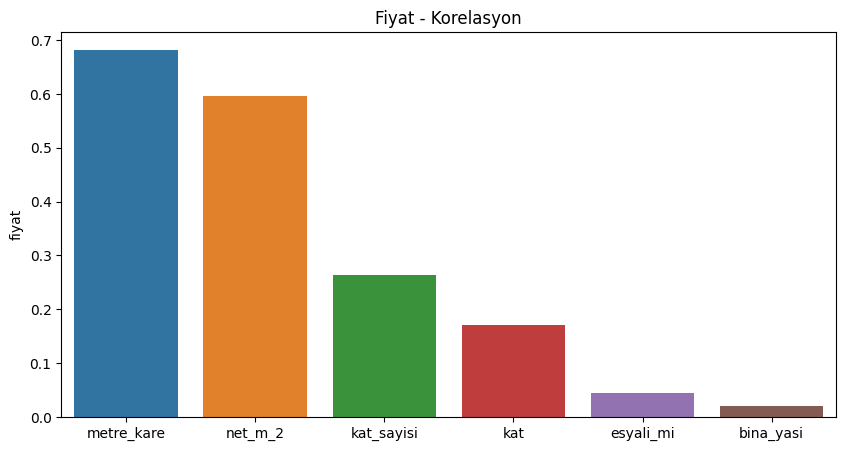

In [254]:
# fiyat ve diğer özelliklerin korelasyonu
korelasyon = df.corr().abs()
print("Korelasyon\n", korelasyon)

f, ax = plt.subplots(figsize=(10, 5))
most_correlated_feature = korelasyon['fiyat'].sort_values(ascending=False).drop('fiyat')
sns.barplot(x = most_correlated_feature.index.values, y = most_correlated_feature)
plt.title("Fiyat - Korelasyon")
plt.show()

In [255]:
from sklearn.model_selection import train_test_split

# Regresyon
X = df.drop(columns=['fiyat'], axis=1)
Y = df['fiyat']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

model = LinearRegression()

# 
results = cross_val_score(model, X, Y, cv=6)
print("Cross-Validation Scores:", results * -1)
print("Mean Cross-Validation Score:", np.mean(results) * -1)
print("Accuracy of Cross-Validation Score: %", ((np.mean(results) * -1)/max(results * -1)) * 100)

Cross-Validation Scores: [-0.26471261 -0.65891083  1.82464407  0.39067751  2.66774884  3.14117797]
Mean Cross-Validation Score: 1.183437492409624
Accuracy of Cross-Validation Score: % 37.67495836229971


In [256]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score, median_absolute_error

# Training
model.fit(X, Y)

# Prediction
y_pred = model.predict(X)

r2 = r2_score(Y, y_pred)
explained_variance = explained_variance_score(Y, y_pred)
median_absolute = median_absolute_error(Y, y_pred)

print("R-squared (R2) Score:", r2)
print("Explained Variance Score:", explained_variance)
print("Median Absolute Error:", median_absolute)

R-squared (R2) Score: 0.6339310354343906
Explained Variance Score: 0.6339310354343906
Median Absolute Error: 1963001.278757154
